In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable
df0=pd.read_csv('download-6.csv')

In [3]:
df0.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df0.shape

(1000, 21)

In [6]:
# Lets build a Ensemble model but need to modify the dataset first
df0.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [7]:
# Check for missing values
df0.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
# Print Shape of model data
df0.shape

(1000, 21)

In [9]:
df1=pd.get_dummies(df0, columns=['account_check_status', 'credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'],drop_first = True)

In [11]:
df1.dtypes
df1.shape

(1000, 49)

In [12]:
df1.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.258333,-0.044009,...,0.125750,-0.113285,0.050523,-0.134589,0.092785,-0.013559,0.005951,-0.021822,-0.036466,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,-0.076455,...,0.212838,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-0.181203,0.164718,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,-0.100510,...,0.248922,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-0.161757,0.276995,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.041591,...,0.044990,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-0.057237,0.014413,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.064303,...,0.188028,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,0.009065,0.095359,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,0.037504,...,0.206368,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,0.043712,0.145259,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.040213,...,-0.012850,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-0.010392,0.065553,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.008700,...,0.077548,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,0.145066,-0.014753,-0.077071
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.159297,...,0.048476,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,0.023542,-0.067149,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.044009,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,1.000000,...,-0.008005,-0.002983,0.020206,0.018934,-0.035183,-0.022932,0.073347,0.014405,-0.028955,-0.036392


In [13]:
df1.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

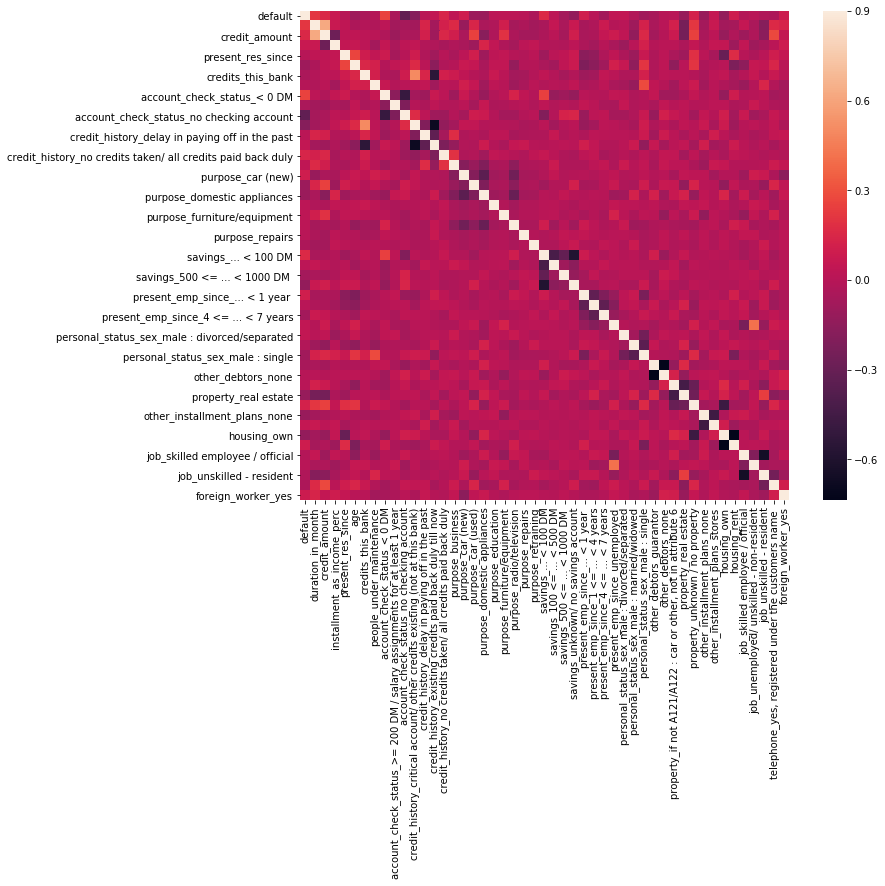

In [14]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True)

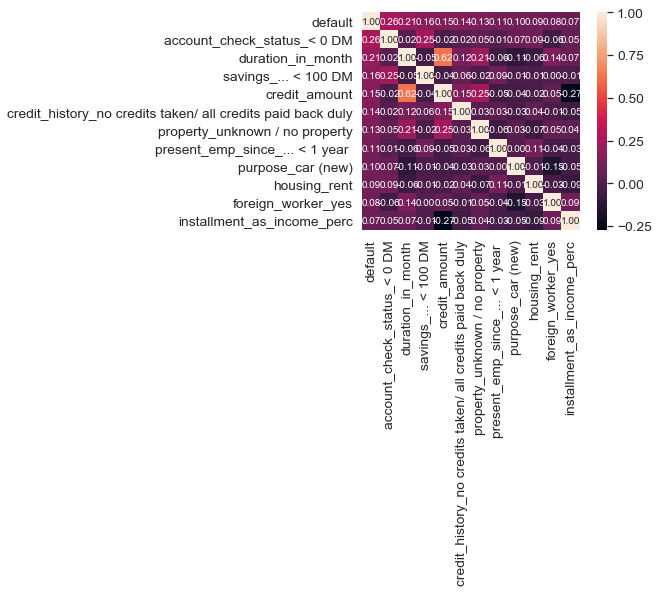

In [15]:
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'default')['default'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Drop the original variables which are converted to dummy

In [ ]:
# I have included 'drop_first = True' in the above Line9.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [27]:
>>> from sklearn.model_selection import train_test_split
X= df1.drop('default',axis=1)
y=df1['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9999)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, n_estimators=500,criterion="entropy",random_state=9999)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [31]:
clf.score(X_test,y_test)

0.76

In [41]:
y_predict=clf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.76

In [44]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_predict)
conf_matrix

array([[195,  15],
       [ 57,  33]])

### Q6 Show the list of the features importance( 1 Marks)

In [59]:
#print(clf.feature_importances_)

print((pd.DataFrame(clf.feature_importances_, columns = ["Importance"], index = X_train.columns)).sort_values(by=['Importance'],ascending=False))

                                                    Importance
credit_amount                                         0.112997
age                                                   0.085953
duration_in_month                                     0.085370
account_check_status_no checking account              0.064180
present_res_since                                     0.040934
installment_as_income_perc                            0.038736
account_check_status_< 0 DM                           0.035324
other_installment_plans_none                          0.026129
credits_this_bank                                     0.022923
purpose_car (new)                                     0.021930
credit_history_critical account/ other credits ...    0.020756
telephone_yes, registered under the customers n...    0.020477
property_if not A121/A122 : car or other, not i...    0.019577
personal_status_sex_male : single                     0.019193
job_skilled employee / official                       0

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

kfold = model_selection.KFold(n_splits=10, random_state=2019)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

In [102]:
kfold=KFold(n_splits = 10,random_state=77)
scoring = 'accuracy'
cv_results=cross_val_score(clf,X,y,cv=kfold,scoring=scoring)
print(cv_results)

[0.87 0.67 0.79 0.81 0.81 0.68 0.75 0.78 0.75 0.76]


In [0]:
#Calculate Mean score

In [103]:
print(cv_results.mean())

0.767


In [0]:
# Calculate score standard deviation using std()

In [104]:
print(cv_results.std())

0.057105166141076934


# Q8 Print the confusion matrix( 1 Marks)

Text(0.5, 10.5, 'Predicted label')

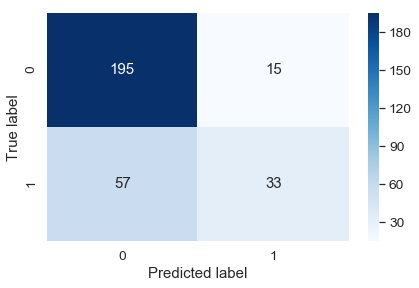

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [96]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.6875

In [95]:
>>> from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.36666666666666664

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [97]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [100]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

AttributeError: 'function' object has no attribute 'fit'

In [99]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  nan
Standard deviation:  nan
